In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp, ttest_ind, spearmanr

In [5]:
BindingDB = pd.read_csv('./data/BindingDB clean.csv')
BindingDB

,ID,Smiles,IC50 (nM),canonical_smiles,Molecular Weight,LogP,num_H_acceptors,num_H_Donors
0,50952815,COc1ccc(NC(=O)N(CCCCC2CCCCC2)CCc2ccc(SC(C)(C)C...,0.28,COc1ccc(NC(=O)N(CCCCC2CCCCC2)CCc2ccc(SC(C)(C)C...,526.743,7.47770,4,2
1,50952818,CC(C)(Sc1ccc(CCN(CCCCC2CCCCC2)C(=O)NC2CCCCC2)c...,0.46,CC(C)(Sc1ccc(CCN(CCCCC2CCCCC2)C(=O)NC2CCCCC2)c...,502.765,7.27930,3,2
2,50952816,COc1cccc(NC(=O)N(CCCCC2CCCCC2)CCc2ccc(SC(C)(C)...,0.59,COc1cccc(NC(=O)N(CCCCC2CCCCC2)CCc2ccc(SC(C)(C)...,526.743,7.47770,4,2
3,50952817,COc1ccccc1NC(=O)N(CCCCC1CCCCC1)CCc1ccc(SC(C)(C...,1.90,COc1ccccc1NC(=O)N(CCCCC1CCCCC1)CCc1ccc(SC(C)(C...,526.743,7.47770,4,2
4,50332806,CC[C@@](C)(Cc1ccc(OCCCOc2ccc(cc2Cl)C2CCCCC2)cc...,2.00,CC[C@@](C)(Cc1ccc(OCCCOc2ccc(C3CCCCC3)cc2Cl)cc...,459.026,7.27900,3,1
...,...,...,...,...,...,...,...,...
997,50386748,Cc1nc(sc1COc1ccc2n(CC(O)=O)ccc2c1)C(F)(F)F,550.00,Cc1nc(C(F)(F)F)sc1COc1ccc2c(ccn2CC(=O)O)c1,370.352,4.08862,5,1
998,50386738,OC(=O)Cn1ccc2cc(OCc3ccc(Oc4ccc(cc4)C(F)(F)F)cc...,562.00,O=C(O)Cn1ccc2cc(OCc3ccc(Oc4ccc(C(F)(F)F)cc4)cc...,441.405,6.11600,4,1
999,50938877,CO[C@@H](Cc1ccc(OCCCOc2ccc(cc2)-c2ccccc2)cc1)C...,567.54,CO[C@@H](Cc1ccc(OCCCOc2ccc(-c3ccccc3)cc2)cc1)C...,406.478,4.84360,4,1
1000,51241764,CCOc1ccc(cc1CC(O)=O)-c1ccc(CCCc2nn(-c3ccc(cc3)...,569.00,CCOc1ccc(-c2ccc(CCCc3nn(-c4ccc(C(F)(F)F)cc4)c(...,602.613,6.30510,7,1


In [6]:
CheMBL = pd.read_csv('./data/CheMBL_clean.csv')
CheMBL


,ID,Smiles,IC50 (nM),canonical_smiles,Molecular Weight,LogP,num_H_acceptors,num_H_Donors
0,CHEMBL556073,Cc1c(Cc2cccc(OCC(=O)O)c2)c2cc(OC(F)(F)F)ccc2n1...,15000.0,Cc1c(Cc2cccc(OCC(=O)O)c2)c2cc(OC(F)(F)F)ccc2n1...,517.887,6.24442,5,1
1,CHEMBL118756,CCCc1cc(C2CCCCC2)ccc1OCCCOc1cccc(C2OC(=O)NC2=O)c1,290.0,CCCc1cc(C2CCCCC2)ccc1OCCCOc1cccc(C2OC(=O)NC2=O)c1,451.563,5.84220,5,1
2,CHEMBL300629,CCCc1cc(Oc2ccccc2)ccc1OCCCOc1ccc(C2SC(=O)NC2=O...,50000.0,CCCc1cc(Oc2ccccc2)ccc1OCCCOc1ccc(C2SC(=O)NC2=O...,477.582,6.30340,6,1
3,CHEMBL209563,CCCc1c(OCCCN(C)c2ccc(CC(=O)O)cc2C)ccc2c(C(F)(F...,600.0,CCCc1c(OCCCN(C)c2ccc(CC(=O)O)cc2C)ccc2c(C(F)(F...,464.484,5.63992,5,1
4,CHEMBL392950,O=C(O)COc1ccc(SCc2ccc(OCc3ccc(F)cc3C(F)(F)F)cc...,3481.0,O=C(O)COc1ccc(SCc2ccc(OCc3ccc(F)cc3C(F)(F)F)cc...,506.517,6.66790,4,1
...,...,...,...,...,...,...,...,...
978,CHEMBL4575562,CCOc1ccc(-c2ccc(CCCc3nn(-c4ccc(S(C)(=O)=O)cc4)...,5040.0,CCOc1ccc(-c2ccc(CCCc3nn(-c4ccc(S(C)(=O)=O)cc4)...,629.710,5.43390,8,1
979,CHEMBL3678128,Cc1c(C)n(Cc2ccc(Cl)c(O[C@@H](C)C(=O)O)c2)c2ccc...,935.0,Cc1c(C)n(Cc2ccc(Cl)c(O[C@@H](C)C(=O)O)c2)c2ccc...,561.122,7.60024,4,2
980,CHEMBL510698,O=C(Nc1ccncc1)c1cc([N+](=O)[O-])ccc1Cl,2950.0,O=C(Nc1ccncc1)c1cc([N+](=O)[O-])ccc1Cl,277.667,2.89550,4,1
981,CHEMBL5286386,CC(C)(O)c1ccc(NC(=O)c2cc(C(=O)NCc3ccc(F)c(F)c3...,16000.0,CC(C)(O)c1ccc(NC(=O)c2cc(C(=O)NCc3ccc(F)c(F)c3...,476.882,5.16700,3,3


In [8]:
BindingDB['pIC50'] = BindingDB['IC50 (nM)'].apply(lambda x: -np.log10(x * 10 ** (-9)))
CheMBL['pIC50'] = CheMBL['IC50 (nM)'].apply(lambda x: -np.log10(x * 10 ** (-9)))

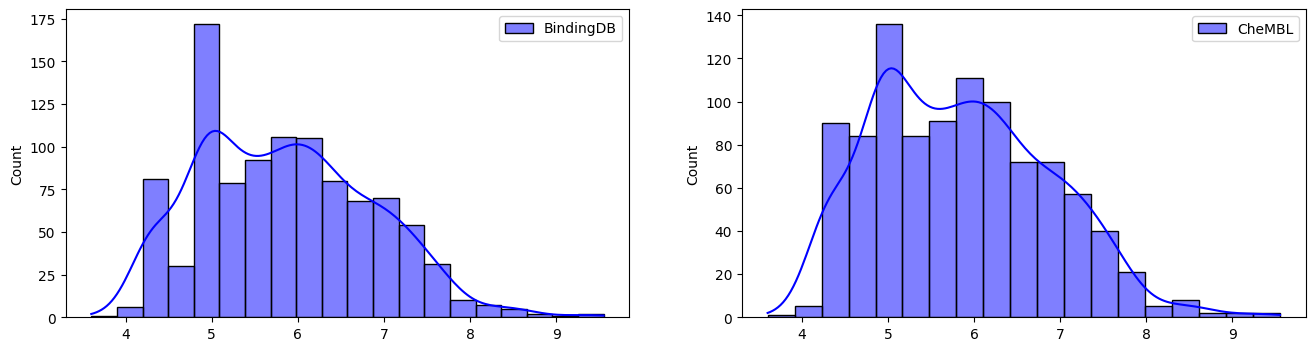

In [9]:
BindingDB_data = BindingDB['pIC50'].to_numpy()
CheMBL_data = CheMBL['pIC50'].to_numpy()

fig = plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
sns.histplot(BindingDB_data, kde=True, color='blue', label = 'BindingDB')   # kde: kernal density estimator
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(CheMBL_data, kde=True, color='blue', label = 'CheMBL')   # kde: kernal density estimator
plt.legend()
plt.show()

In [10]:
ks_stat, ks_pval = ks_2samp(BindingDB_data, CheMBL_data)
print(f'KS Statistic: {ks_stat:.4f}, p-value: {ks_pval:.4e}')

KS Statistic: 0.0150, p-value: 9.9979e-01


In [11]:
# T-test
t_stat, t_pval = ttest_ind(BindingDB_data, CheMBL_data, equal_var=False)
print(f'T-test Statistic: {t_stat:.4f}, p-value: {t_pval:.4e}')

T-test Statistic: 0.1356, p-value: 8.9214e-01
